<a href="https://colab.research.google.com/github/mingmingsoo/sam-and-zzon/blob/ming/%ED%98%9C%EC%A4%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 환경 설정(한글 인코딩 등)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get update -qq
!apt-get install fonts-nanum* -qq   # 글꼴설치(나눔글꼴)

fe=fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumSquare.ttf', name='NanumSquare')
fm.fontManager.ttflist.insert(0,fe)   # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size':10, 'font.family':'NanumSquare'})
mpl.rcParams['axes.unicode_minus'] = False

In [ ]:
# # 드라이브 마운트
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ### 엑셀 -> csv 로 저장
# file_list = [f for f in os.listdir(path) if f.endswith('.xls')]
# for f in file_list:
#   df = pd.read_excel(path+f)
#   df.to_csv(f'{path+f.split(".")[0]}.csv', encoding = 'ms949')

# 노인 보행 교통사고.csv

## 데이터 전처리

In [ ]:
import warnings
warnings.filterwarnings(action = 'ignore')

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def excel_to_csv(excel, csv):
    pd.read_excel(excel).to_csv(csv, index=False)

lst = []
df_ = pd.DataFrame()

for i in range(1, 5):
    excel = f'/content/drive/MyDrive/😵산대특 팀프로젝트/🐥🐤🐣영주시🧡💚💙/code/data/노인 보행 교통사고{i}.xls'
    csv = f'csv{i}.csv'
    excel_to_csv(excel, csv)
    lst.append(csv)
lst

['csv1.csv', 'csv2.csv', 'csv3.csv', 'csv4.csv']

In [ ]:
df0 = pd.read_csv(lst[0])
df0 = df0[~df0['기준년도'].str.contains('출처')]

for j in range(1,4):
  df1 = pd.read_csv(lst[j])
  df1 = df1[~df1['기준년도'].str.contains('출처')]
  df1 = df1.iloc[1:,:]

  df0 = pd.concat([df0, df1], axis =0, ignore_index = True)
df0 = df0.replace('-', 0) # - 는 0 임
df0.iloc[1:,:] = df0.iloc[1:,:].astype(int)

df0

,기준년도,포항시,포항시.1,포항시.2,경주시,경주시.1,경주시.2,김천시,김천시.1,김천시.2,...,봉화군.2,울진군,울진군.1,울진군.2,울릉군,울릉군.1,울릉군.2,경산시,경산시.1,경산시.2
0,기준년도,사고[건],부상[명],사망[명],사고[건],부상[명],사망[명],사고[건],부상[명],사망[명],...,사망[명],사고[건],부상[명],사망[명],사고[건],부상[명],사망[명],사고[건],부상[명],사망[명]
1,2005,68,60,8,73,59,15,23,18,5,...,1,15,14,1,0,0,0,58,51,7
2,2006,81,75,6,91,73,19,41,31,10,...,0,10,9,1,2,1,1,38,33,6
3,2007,91,80,13,71,60,11,38,30,9,...,2,10,10,0,1,1,0,42,38,6
4,2008,89,85,7,55,47,9,35,30,7,...,1,4,4,0,0,0,0,55,45,10
5,2009,85,76,14,79,68,12,40,34,6,...,2,11,10,2,2,2,0,56,49,8
6,2010,93,87,9,84,75,9,34,29,5,...,1,13,12,1,0,0,0,64,56,9
7,2011,74,63,11,78,70,9,37,31,6,...,2,19,19,0,1,1,0,63,55,8
8,2012,90,75,15,90,79,13,27,24,3,...,0,10,8,2,3,3,0,45,38,7
9,2013,100,96,4,98,87,13,38,32,7,...,2,14,13,1,2,2,0,55,49,6


## 경북 평균과 영주시 비교

In [ ]:
# df0.info()

dfx = df0.iloc[1:,1::3] # 첫번째 행부터 3씩 증가하게
dfx.insert(0, '년도', df0.iloc[:,0]) # 년도 열도 넣어주기
dfx

# dfx.to_excel('check.xlsx')

,년도,포항시,경주시,김천시,안동시,구미시,영주시,영천시,문경시,상주시,...,영덕군,청도군,고령군,성주군,칠곡군,예천군,봉화군,울진군,울릉군,경산시
1,2005,68,73,23,55,38,45,39,33,31,...,14,11,18,16,22,22,16,15,0,58
2,2006,81,91,41,49,48,35,31,15,32,...,14,20,8,12,31,17,4,10,2,38
3,2007,91,71,38,53,47,40,39,24,31,...,11,10,8,18,22,18,12,10,1,42
4,2008,89,55,35,60,50,39,41,17,28,...,17,9,9,12,22,12,8,4,0,55
5,2009,85,79,40,50,62,34,54,22,24,...,16,11,12,18,18,16,18,11,2,56
6,2010,93,84,34,77,57,41,48,17,20,...,12,15,15,21,24,12,6,13,0,64
7,2011,74,78,37,51,49,38,41,16,27,...,13,14,11,17,24,12,6,19,1,63
8,2012,90,90,27,57,46,36,34,23,28,...,10,8,14,14,33,16,4,10,3,45
9,2013,100,98,38,80,41,59,33,18,30,...,19,13,7,19,18,11,13,14,2,55
10,2014,95,93,56,64,58,46,45,22,32,...,11,12,18,11,28,11,6,7,2,60


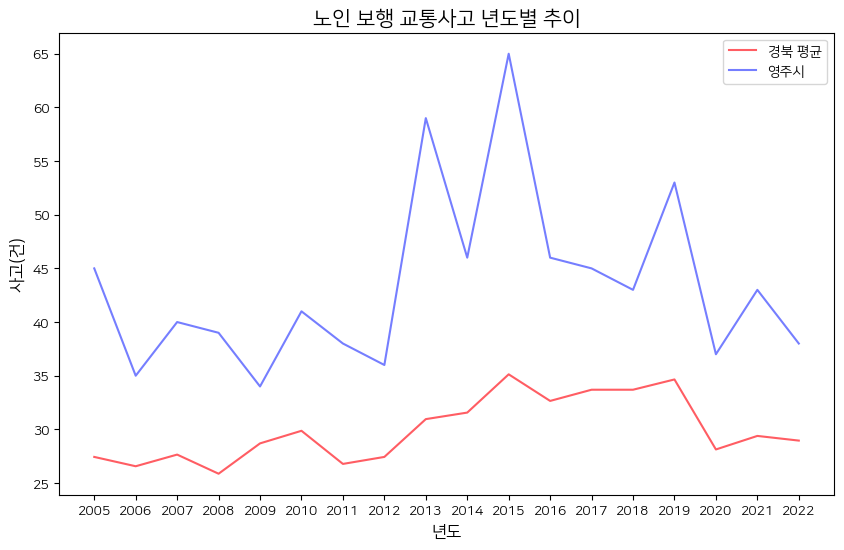

경북 평균 상관계수:  0.5484830978030566
영주 상관계수:  0.2250801017601924


In [ ]:
x = dfx['년도'].astype(str)
y_t = dfx.iloc[:,1:].mean(axis = 1) # 경북 전체 사고 평균값
y_y = dfx['영주시']

plt.figure(figsize = (10,6))
plt.plot(x , y_t, label = '경북 평균', color = '#ff5d63')
plt.plot(x , y_y, label = '영주시', color = '#757eff')
plt.title('노인 보행 교통사고 년도별 추이', fontsize = 15)
plt.xlabel('년도', fontsize = 12)
plt.ylabel('사고(건)', fontsize = 12)
plt.legend()

# plt.savefig('/content/drive/MyDrive/😵산대특 팀프로젝트/🐥🐤🐣영주시🧡💚💙/code/시각화/노인 보행 교통사고 년도별 추이.png', bbox_inches = 'tight')
plt.show()

xx = dfx['년도'].astype(float)
yy = dfx['영주시'].astype(float)
print('경북 평균 상관계수: ', np.corrcoef(xx,y_t)[0,1])
print('영주 상관계수: ', np.corrcoef(xx,yy)[0,1])


## 영주시 사건, 부상, 사망 추이

In [ ]:
dfy = df0[['영주시','영주시.1','영주시.2']]
dfy.insert(0, '기준년도', df0.iloc[:,0])
dfy = pd.DataFrame(dfy.values[1:], columns=dfy.iloc[0])
dfy

,기준년도,사고[건],부상[명],사망[명]
0,2005,45,36,10
1,2006,35,31,4
2,2007,40,39,1
3,2008,39,36,3
4,2009,34,34,4
5,2010,41,36,5
6,2011,38,33,5
7,2012,36,36,0
8,2013,59,55,5
9,2014,46,43,3


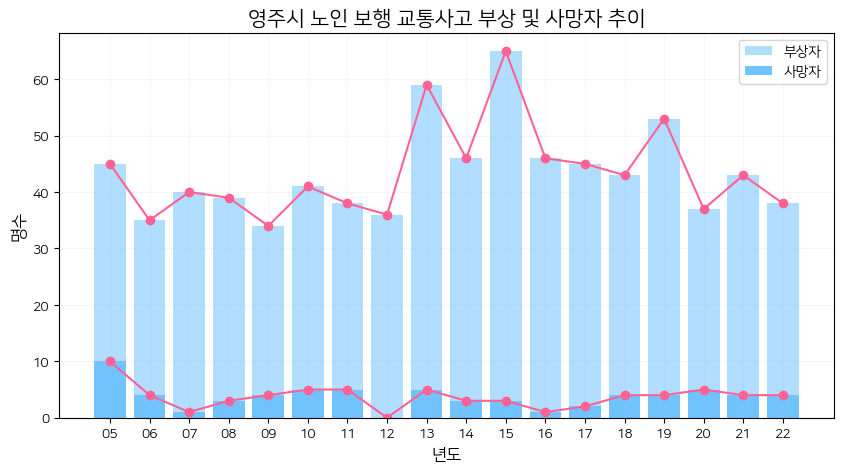

In [ ]:
x = dfy['기준년도'].astype(str).str[-2:]
y_t = dfy['사고[건]']
y_p = dfy['사망[명]']


plt.figure(figsize = (10,5))

bar_width = 0.8
plt.bar(x, y_t, color = '#b1deff', width=bar_width, label = '부상자')
plt.bar(x, y_p, color = '#71c3fd', width=bar_width, label = '사망자')

plt.plot(x, y_t, color = '#ff6294', marker = 'o')
plt.plot(x, y_p, color = '#ff6294', marker = 'o')

plt.title('영주시 노인 보행 교통사고 부상 및 사망자 추이',fontsize = 15)
plt.xlabel('년도',fontsize = 12)
plt.ylabel('명수',fontsize = 12)

plt.grid(alpha = 0.1)
plt.legend()

# plt.savefig('/content/drive/MyDrive/😵산대특 팀프로젝트/🐥🐤🐣영주시🧡💚💙/code/시각화/영주시 노인 보행 교통사고 부상 및 사망자 추이.png', bbox_inches = 'tight')
plt.show()

## 🌻🌻인구 밀도 대비 사건율도 보면 좋을 듯🌻🌻
## ----> 인구 밀도 or 인구 전체 자료 가져오기

# OECD 국가 교통사고 통계
- 인구10만명당 사망자수

## 데이터 전처리

In [ ]:
excel1 = '/content/drive/MyDrive/😵산대특 팀프로젝트/🐥🐤🐣영주시🧡💚💙/code/data/OECD 국가 인구10만명당 사망자수1.xls'
excel2 = '/content/drive/MyDrive/😵산대특 팀프로젝트/🐥🐤🐣영주시🧡💚💙/code/data/OECD 국가 인구10만명당 사망자수2.xls'

df1 = pd.read_excel(excel1)
df2 = pd.read_excel(excel2)
df1
df2 = df2.iloc[:,1:]
df2

df = pd.concat([df1,df2], axis = 1)
df = df.iloc[:-1,:].replace('-', np.nan) # 마지막 출처행 지우기
df.set_index(df.columns[0], inplace = True)
df

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
국가,,,,,,,,,,
호주,5.7,5.7,5.1,4.9,5.1,5.3,5.0,4.5,4.7,4.3
독일,4.9,4.4,4.1,4.1,4.2,3.9,3.8,4.0,3.7,3.3
그리스,10.4,9.0,8.1,7.3,7.3,7.7,6.8,6.6,6.6,5.6
헝가리,6.4,6.1,6.0,6.3,6.5,6.2,6.4,6.5,6.2,4.7
아이슬란드,3.8,2.8,4.6,1.2,4.8,5.4,4.7,5.1,1.7,2.2
아일랜드,4.1,3.6,4.1,4.2,3.5,3.9,3.3,3.0,2.9,3.0
이탈리아,6.4,6.2,5.6,5.6,5.7,5.5,5.6,5.6,5.3,4.0
일본,4.3,4.1,4.0,3.8,3.8,3.7,3.5,3.3,3.1,2.7
룩셈부르크,6.4,6.4,8.3,6.3,6.3,5.5,4.2,5.9,3.5,4.1


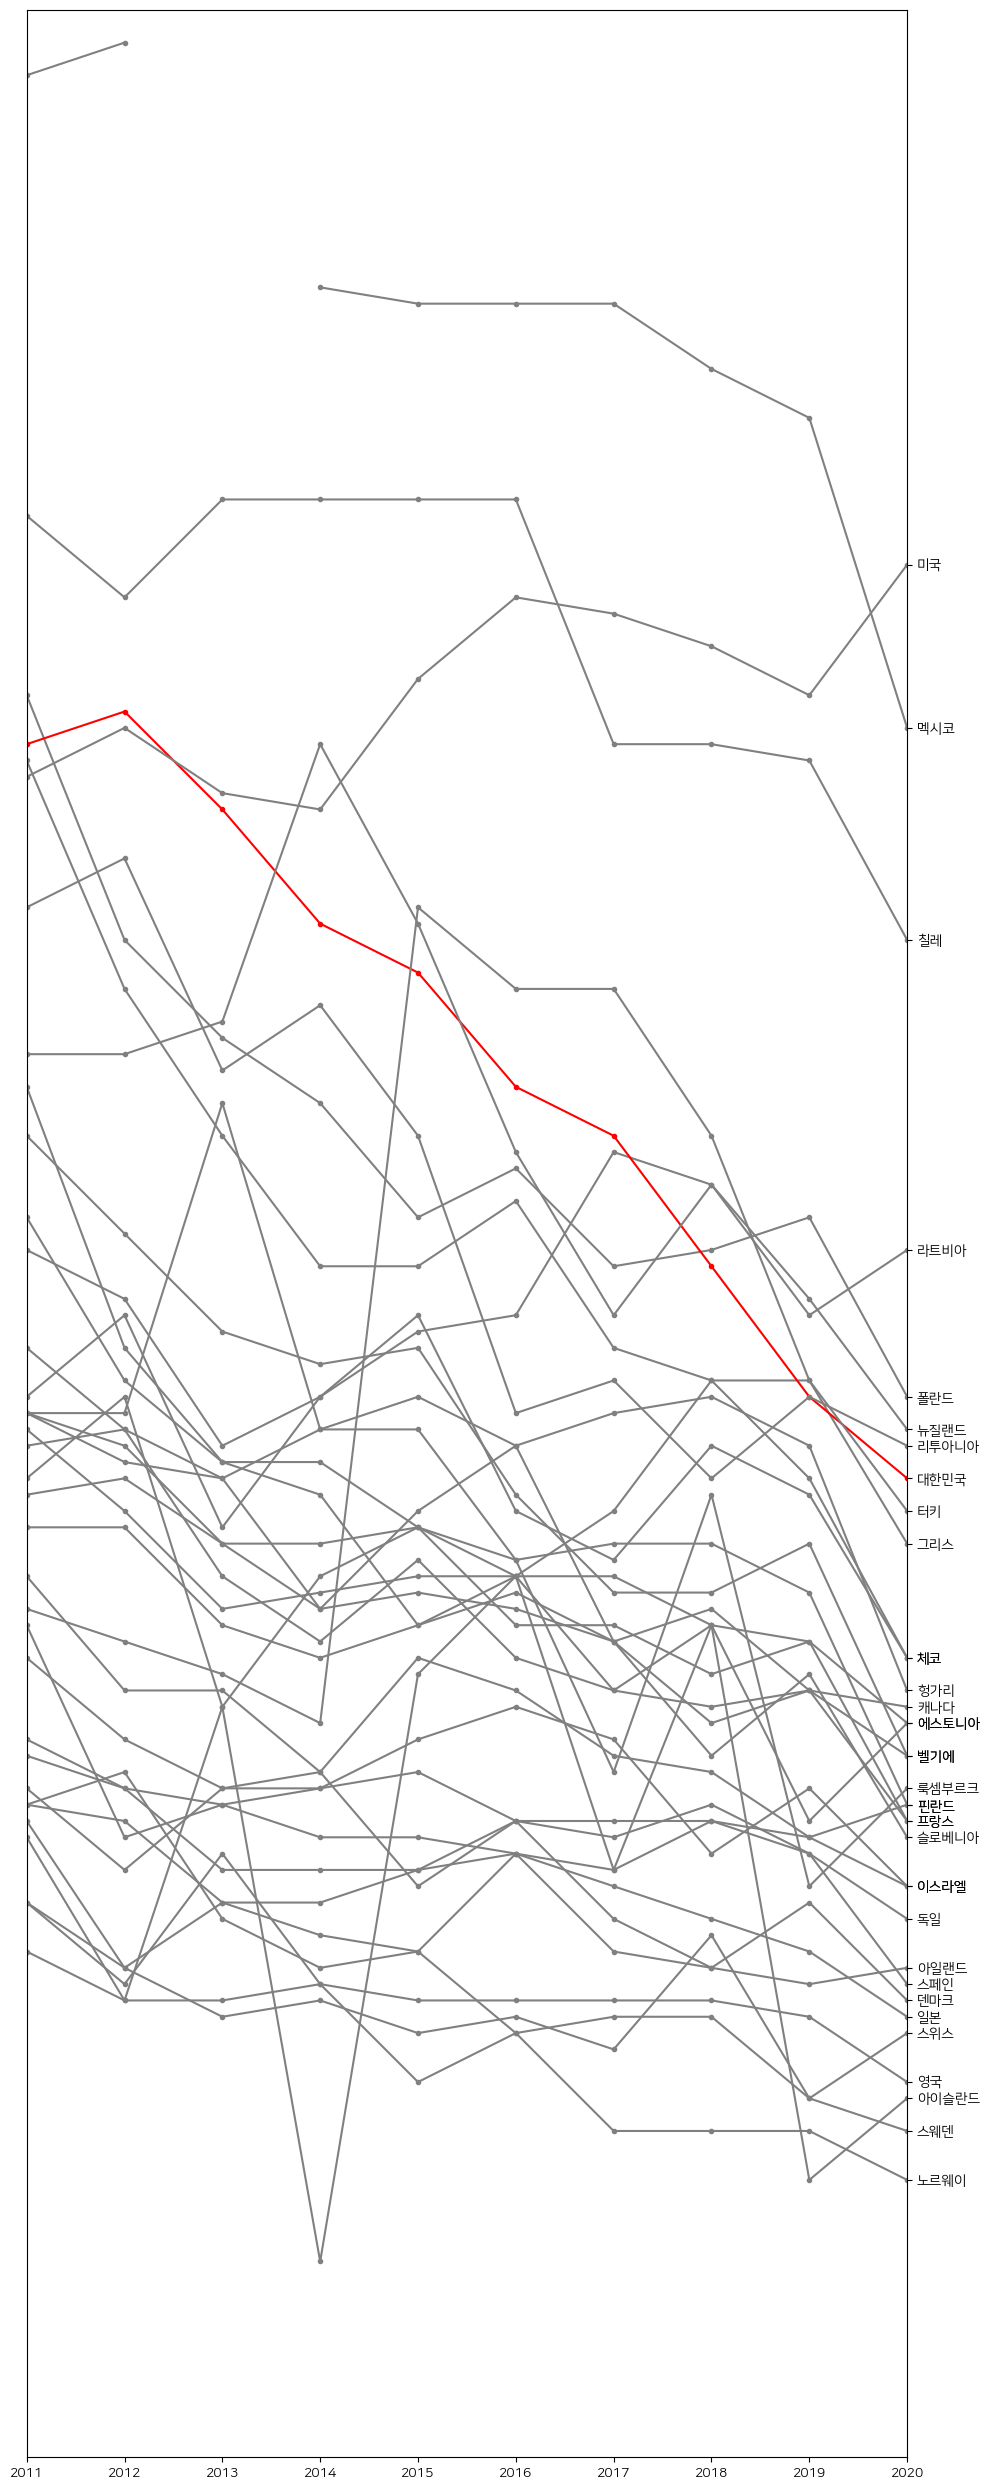

In [ ]:
import numpy as np
fig = plt.figure(figsize = (10,25))
rank2020 = df['2020']


for c in rank2020.index:
  t = df.loc[c].replace('-', np.nan)
  color = 'red' if c == '대한민국' else 'gray'
  plt.plot(t.index , t, '.-', color= color)
plt.xlim(['2011', '2020'])  # x축 범위 제한
plt.ylim([0, df.max().max() + 0.2])  # y축 범위 제한
plt.yticks(rank2020, rank2020.index)  # y축 눈금 표시(위치, 값)

ax = plt.gca() #y축 invert
ax.yaxis.set_label_position('right')  # y축 눈금 오른쪽에 표시
ax.yaxis.tick_right()  # y축 눈금 오른쪽에 표시 => 이거해야 y축 text 옆으로 이동
plt.tight_layout()  # subplot간의 간격 조절
plt.savefig('aa',bbox_inches = 'tight')
plt.show()


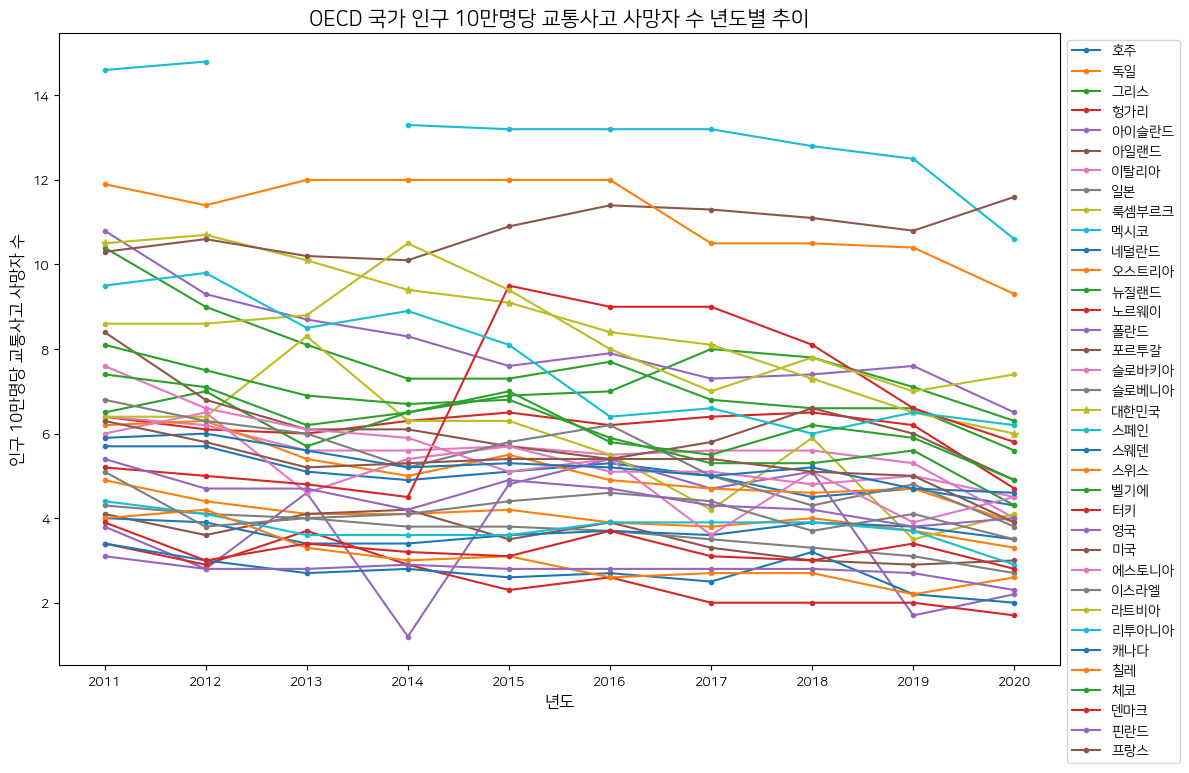

In [ ]:
# 🌸멕시코 결측값 처리??
fig, ax1 = plt.subplots(figsize=(12, 8))

# 왼쪽 y축 (사망자 수)
ax1.set_xlabel('년도', fontsize = 12)
ax1.set_ylabel('인구 10만명당 교통사고 사망자 수', fontsize = 12)
ax1.set_title('OECD 국가 인구 10만명당 교통사고 사망자 수 년도별 추이', fontsize = 15)

for country in df.index:
    marker = '*' if country == '대한민국' else '.'
    ax1.plot(df.columns, df.loc[country].astype(float), '-', label=country, marker=marker)
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))

# # 오른쪽 y축 (나라 이름)
# ax2 = ax1.twinx()
# #ax2.set_ylabel('국가', fontsize = 12)
# ax2.set_ylim(ax1.get_ylim())
# ax2.set_yticks(range(len(df.index)))
# ax2.set_yticklabels([f'{country}: {df.loc[country, "2020"]}' for country in df.index])


plt.tight_layout()
plt.show()

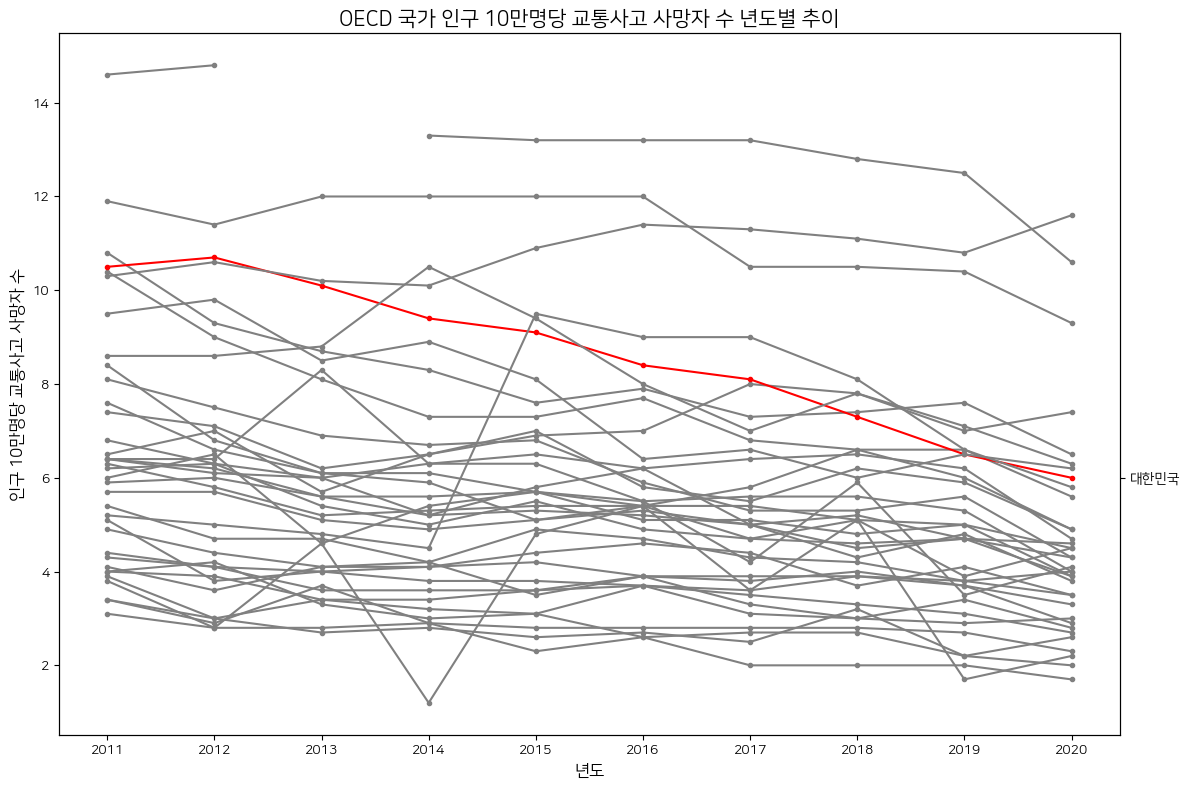

In [ ]:
# 🌸멕시코 결측값 처리??
fig, ax1 = plt.subplots(figsize=(12, 8))

# 왼쪽 y축 (사망자 수)
ax1.set_xlabel('년도', fontsize = 12)
ax1.set_ylabel('인구 10만명당 교통사고 사망자 수', fontsize = 12)
ax1.set_title('OECD 국가 인구 10만명당 교통사고 사망자 수 년도별 추이', fontsize = 15)

for country in df.index:
    color = 'red' if country == '대한민국' else 'gray'
    ax1.plot(df.columns, df.loc[country].astype(float), '.-', label=country, color=color)


# 오른쪽 y축 (나라 이름)
ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticks([df.loc['대한민국', '2020']])
ax2.set_yticklabels(['대한민국'])

plt.tight_layout()
plt.show()

# 연령층별 보행 사상자

## 데이터 전처리

In [ ]:
excel1 = '/content/drive/MyDrive/😵산대특 팀프로젝트/🐥🐤🐣영주시🧡💚💙/code/data/연령층별 보행 사상자1.xls'
excel2 = '/content/drive/MyDrive/😵산대특 팀프로젝트/🐥🐤🐣영주시🧡💚💙/code/data/연령층별 보행 사상자2.xls'

df1 = pd.read_excel(excel1) #232 rows -> 하나 부족함: 충북 창원군
df2 = pd.read_excel(excel2) #233 rows
df2


# 청원군 몇번째인지 찾기
index_of_chwon = df2.iloc[:, 1][df2.iloc[:, 1] == '청원군'].index
index_of_chwon #Int64Index([129], dtype='int64')

# df2.iloc[129,:] 확인 ok
df1
df2

,시도,시군구,2013,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,...,2017.12,2017.13,2017.14,2017.15,2017.16,2017.17,2017.18,2017.19,2017.20,2017.21
0,시도,시군구,합계,합계,12세 이하,12세 이하,13~20세,13~20세,21~30세,21~30세,...,51~60세,51~60세,61~64세,61~64세,65~70세,65~70세,71세 이상,71세 이상,기타,기타
1,시도,시군구,사망[명],부상[명],사망[명],부상[명],사망[명],부상[명],사망[명],부상[명],...,사망[명],부상[명],사망[명],부상[명],사망[명],부상[명],사망[명],부상[명],사망[명],부상[명]
2,서울,종로구,11,364,0,13,0,32,0,66,...,3,55,0,23,1,26,4,48,-,-
3,서울,중구,8,406,0,14,0,23,2,74,...,1,64,0,20,0,30,0,46,0,0
4,서울,용산구,4,310,0,22,0,15,1,59,...,2,38,0,17,0,18,2,42,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,경남,합천군,5,40,0,1,-,-,0,1,...,0,2,0,2,0,3,2,16,-,-
229,경남,창원시(통합),51,935,2,121,1,91,4,119,...,7,159,3,53,3,59,8,116,0,0
230,제주,제주시,32,812,0,107,3,84,1,104,...,4,130,3,40,1,47,9,101,-,-
231,제주,서귀포시,13,196,0,22,0,17,0,19,...,2,37,0,14,2,18,4,42,0,1


In [ ]:
df2.columns

Index(['시도', '시군구', '2013', '2013.1', '2013.2', '2013.3', '2013.4', '2013.5',
       '2013.6', '2013.7',
       ...
       '2017.12', '2017.13', '2017.14', '2017.15', '2017.16', '2017.17',
       '2017.18', '2017.19', '2017.20', '2017.21'],
      dtype='object', length=112)

In [ ]:
df = pd.merge(df2, df1, on=['시도','시군구'], how='outer')
df = df.fillna(0)
df = df.replace('-',0)
df = df.iloc[4:,:]

# 창원 nan 잘 됐는지 확인
a = df.iloc[127,:] # 행 두개날려서 127
for i in a:
  print(i)
##################

충북
청원군
9
89
0
12
0
9
0
13
1
10
1
9
3
9
1
1
0
8
3
18
0
0
5
43
0
4
0
3
0
5
0
7
0
7
0
7
1
0
1
5
3
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [ ]:
df

,시도,시군구,2013,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,...,2022.12,2022.13,2022.14,2022.15,2022.16,2022.17,2022.18,2022.19,2022.20,2022.21
4,서울,종로구,11,364,0,13,0,32,0,66,...,0,39,0,16,1,26,0,22,0,0
5,서울,중구,8,406,0,14,0,23,2,74,...,1,48,0,17,1,21,0,30,0,0
6,서울,용산구,4,310,0,22,0,15,1,59,...,3,32,1,17,0,9,2,25,0,1
7,서울,성동구,5,266,0,18,0,20,0,36,...,1,30,1,19,1,23,0,25,0,0
8,서울,동대문구,10,543,0,35,1,44,1,80,...,0,80,0,36,0,45,2,91,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,경남,합천군,5,40,0,1,0,0,0,1,...,0,7,0,2,0,3,2,13,0,0
231,경남,창원시(통합),51,935,2,121,1,91,4,119,...,2,98,0,45,4,62,10,120,0,0
232,제주,제주시,32,812,0,107,3,84,1,104,...,1,91,1,31,1,38,6,74,0,0
233,제주,서귀포시,13,196,0,22,0,17,0,19,...,1,25,0,14,0,23,2,43,0,0


In [ ]:
df # 231 rows × 222 columns

,시도,시군구,2013,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,...,2022.12,2022.13,2022.14,2022.15,2022.16,2022.17,2022.18,2022.19,2022.20,2022.21
4,서울,종로구,11,364,0,13,0,32,0,66,...,0,39,0,16,1,26,0,22,0,0
5,서울,중구,8,406,0,14,0,23,2,74,...,1,48,0,17,1,21,0,30,0,0
6,서울,용산구,4,310,0,22,0,15,1,59,...,3,32,1,17,0,9,2,25,0,1
7,서울,성동구,5,266,0,18,0,20,0,36,...,1,30,1,19,1,23,0,25,0,0
8,서울,동대문구,10,543,0,35,1,44,1,80,...,0,80,0,36,0,45,2,91,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,경남,합천군,5,40,0,1,0,0,0,1,...,0,7,0,2,0,3,2,13,0,0
231,경남,창원시(통합),51,935,2,121,1,91,4,119,...,2,98,0,45,4,62,10,120,0,0
232,제주,제주시,32,812,0,107,3,84,1,104,...,1,91,1,31,1,38,6,74,0,0
233,제주,서귀포시,13,196,0,22,0,17,0,19,...,1,25,0,14,0,23,2,43,0,0


In [ ]:
df_index = pd.merge(df2,df1)
df_index  = df_index.iloc[1:3,:] #222
df_index

,시도,시군구,2013,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,...,2022.12,2022.13,2022.14,2022.15,2022.16,2022.17,2022.18,2022.19,2022.20,2022.21
1,시도,시군구,합계,합계,12세 이하,12세 이하,13~20세,13~20세,21~30세,21~30세,...,사망[명],부상[명],사망[명],부상[명],사망[명],부상[명],사망[명],부상[명],사망[명],부상[명]
2,시도,시군구,사망[명],부상[명],사망[명],부상[명],사망[명],부상[명],사망[명],부상[명],...,51~60세,51~60세,61~64세,61~64세,65~70세,65~70세,71세 이상,71세 이상,기타,기타


In [ ]:
dff = pd.concat([df_index, df], axis = 0)
dff
dff.to_excel('check.xlsx', encoding = 'cp949')

In [ ]:
dff


,시도,시군구,2013,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,2013.7,...,2022.12,2022.13,2022.14,2022.15,2022.16,2022.17,2022.18,2022.19,2022.20,2022.21
1,시도,시군구,합계,합계,12세 이하,12세 이하,13~20세,13~20세,21~30세,21~30세,...,사망[명],부상[명],사망[명],부상[명],사망[명],부상[명],사망[명],부상[명],사망[명],부상[명]
2,시도,시군구,사망[명],부상[명],사망[명],부상[명],사망[명],부상[명],사망[명],부상[명],...,51~60세,51~60세,61~64세,61~64세,65~70세,65~70세,71세 이상,71세 이상,기타,기타
4,서울,종로구,11,364,0,13,0,32,0,66,...,0,39,0,16,1,26,0,22,0,0
5,서울,중구,8,406,0,14,0,23,2,74,...,1,48,0,17,1,21,0,30,0,0
6,서울,용산구,4,310,0,22,0,15,1,59,...,3,32,1,17,0,9,2,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,경남,합천군,5,40,0,1,0,0,0,1,...,0,7,0,2,0,3,2,13,0,0
231,경남,창원시(통합),51,935,2,121,1,91,4,119,...,2,98,0,45,4,62,10,120,0,0
232,제주,제주시,32,812,0,107,3,84,1,104,...,1,91,1,31,1,38,6,74,0,0
233,제주,서귀포시,13,196,0,22,0,17,0,19,...,1,25,0,14,0,23,2,43,0,0


# 보행노인 사고다발지역정보 API

## 데이터 전처리

In [ ]:
import requests
import pandas as pd

In [ ]:
searchYearCd=[2023057,2022042,2021024,2020027,2019036,2018029,2017029,2016146,2015048,2014105,2013098] # 영주시 전체
serviceKey = 'iVWEqPEqBD8KhX7F7lU4D9Ap90eHZtSVqrcaH%2BM%2FPsKfUTW7749lAduvqDa7Ss4P'
url = f'https://opendata.koroad.or.kr/data/rest/frequentzone/oldman?authKey={serviceKey}&searchYearCd=2023057&sido=47&gugun=210&type=json'

In [ ]:
searchYearCd=[2023057,2022042,2021024,2020027,2019036,2018029,2017029,2016146,2015048,2014105,2013098]
serviceKey = 'iVWEqPEqBD8KhX7F7lU4D9Ap90eHZtSVqrcaH%2BM%2FPsKfUTW7749lAduvqDa7Ss4P'

df = pd.DataFrame()
for i in searchYearCd:
    url = f'https://opendata.koroad.or.kr/data/rest/frequentzone/oldman?authKey={serviceKey}&searchYearCd={i}&sido=47&gugun=210&type=json'
    response = requests.get(url)
    response
    response.json()
    data=response.json()['items']['item']
    temp_df = pd.DataFrame(data)
    df = pd.concat([df, temp_df], ignore_index = True)
df.head()

# 시간 오래걸리니까 한번만 실행하기

,afos_fid,afos_id,bjd_cd,spot_cd,sido_sgg_nm,spot_nm,occrrnc_cnt,caslt_cnt,dth_dnv_cnt,se_dnv_cnt,sl_dnv_cnt,wnd_dnv_cnt,geom_json,lo_crd,la_crd
0,6831277,2023057,4721010100,47210001,경북 영주시1,경북 영주시 영주1동(영광중학교 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6214188...",128.619622263695,36.828153156652
1,6831200,2023057,4721010400,47210002,경북 영주시2,경북 영주시 휴천동(파리바게뜨 영주남산점 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6295379...",128.627741313861,36.818848023353
2,6780662,2022042,4721010300,47210001,경상북도 영주시1,경상북도 영주시 하망동(하망성당어린이집 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6304448...",128.629546536345,36.824480673245
3,6780633,2022042,4721010400,47210002,경상북도 영주시2,경상북도 영주시 휴천동(한국농어촌공사영주봉 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6287906...",128.627892322474,36.818727286536
4,6780700,2022042,4721010100,47210003,경상북도 영주시3,경상북도 영주시 영주동(영주1동행정복지센터 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6233171...",128.622418835362,36.827793289130


In [ ]:
# nan 값 확인, 컬럼명 변경
df.columns
df.rename(columns =
{'afos_fid':'다발지역FID', 'afos_id':'다발지역ID', 'bjd_cd':'법정동코드', 'spot_cd':'지점코드', 'sido_sgg_nm':'시도시군구명', 'spot_nm':'지점명',
       'occrrnc_cnt':'사고건수', 'caslt_cnt':'사상자수', 'dth_dnv_cnt':'사망자수', 'se_dnv_cnt':'중상자수', 'sl_dnv_cnt':'경상자수',
       'wnd_dnv_cnt':'부상신고자수', 'geom_json':'다발지역폴리곤', 'lo_crd':'경도', 'la_crd':'위도'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   다발지역FID  29 non-null     int64 
 1   다발지역ID   29 non-null     object
 2   법정동코드    29 non-null     object
 3   지점코드     29 non-null     object
 4   시도시군구명   29 non-null     object
 5   지점명      29 non-null     object
 6   사고건수     29 non-null     int64 
 7   사상자수     29 non-null     int64 
 8   사망자수     29 non-null     int64 
 9   중상자수     29 non-null     int64 
 10  경상자수     29 non-null     int64 
 11  부상신고자수   29 non-null     int64 
 12  다발지역폴리곤  29 non-null     object
 13  경도       29 non-null     object
 14  위도       29 non-null     object
dtypes: int64(7), object(8)
memory usage: 3.5+ KB


In [ ]:
# 필요 행만 추출
# 경도, 위도는 원의 중심좌표
# 다발지역폴리곤은 원 중심 주위로 원 좌표 ( 반지름만 있어도 될것을 굳이 ...) --> 반지름이 행마다 다 다르네!!! => 반지름 각각 다 구해줘야함  -> 파생컬럼 만들어도 좋을 듯
df.head()

col = '지점명	사고건수	사상자수	사망자수	중상자수	경상자수	부상신고자수	다발지역폴리곤	경도	위도'.split('\t')
col
df_col = df[col]
df_col.head(3)

,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,다발지역폴리곤,경도,위도
0,경북 영주시 영주1동(영광중학교 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6214188...",128.619622263695,36.828153156652
1,경북 영주시 휴천동(파리바게뜨 영주남산점 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6295379...",128.627741313861,36.818848023353
2,경상북도 영주시 하망동(하망성당어린이집 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6304448...",128.629546536345,36.824480673245


In [ ]:
df_col['시'] = df_col['지점명'].apply(lambda x: x.split()[1])
df_col['동'] = df_col['지점명'].apply(lambda x: x.split()[2].split('(')[0])
df_col['부근'] = df_col['지점명'].apply(lambda x: x.split('(')[1].split(' ')[0])

df_col

,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,다발지역폴리곤,경도,위도,시,동,부근
0,경북 영주시 영주1동(영광중학교 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6214188...",128.619622263695,36.828153156652,영주시,영주1동,영광중학교
1,경북 영주시 휴천동(파리바게뜨 영주남산점 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6295379...",128.627741313861,36.818848023353,영주시,휴천동,파리바게뜨
2,경상북도 영주시 하망동(하망성당어린이집 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6304448...",128.629546536345,36.824480673245,영주시,하망동,하망성당어린이집
3,경상북도 영주시 휴천동(한국농어촌공사영주봉 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6287906...",128.627892322474,36.818727286536,영주시,휴천동,한국농어촌공사영주봉
4,경상북도 영주시 영주동(영주1동행정복지센터 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6233171...",128.622418835362,36.827793289130,영주시,영주동,영주1동행정복지센터
5,경상북도 영주시 영주동(영주1동행정복지센터 부근),4,4,1,1,2,0,"{""type"":""Polygon"",""coordinates"":[[[128.6239115...",128.622114910376,36.827513021710,영주시,영주동,영주1동행정복지센터
6,경상북도 영주시 휴천동(한국어린이교육선교회 부근),4,4,0,3,1,0,"{""type"":""Polygon"",""coordinates"":[[[128.6302856...",128.628489030745,36.819660003108,영주시,휴천동,한국어린이교육선교회
7,경상북도 영주시 가흥동(세무서사거리 부근),4,4,1,3,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6217099...",128.619913342128,36.819759116491,영주시,가흥동,세무서사거리
8,경상북도 영주시 하망동(원당로121 부근),4,4,0,2,2,0,"{""type"":""Polygon"",""coordinates"":[[[128.6285484...",128.626751798658,36.823366388049,영주시,하망동,원당로121
9,경상북도 영주시 영주동(영주제일교회입구 부근),3,3,0,3,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6242785...",128.622481913810,36.827993692256,영주시,영주동,영주제일교회입구


In [ ]:
df_col['동'].value_counts()

영주동     12
휴천동      7
하망동      5
가흥동      4
영주1동     1
Name: 동, dtype: int64

In [ ]:
import json

# 다발지역폴리곤 데이터를 파싱하여 폴리곤 좌표를 추출하는 함수
def extract_polygon_coordinates(polygon_string):
    polygon_dict = json.loads(polygon_string)
    coordinates = polygon_dict['coordinates'][0]
    return coordinates

# 폴리곤 좌표를 추출하여 새로운 컬럼에 추가
df_col['폴리곤'] = df_col['다발지역폴리곤'].apply(extract_polygon_coordinates)

df_col

,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,다발지역폴리곤,경도,위도,시,동,부근,폴리곤
0,경북 영주시 영주1동(영광중학교 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6214188...",128.619622263695,36.828153156652,영주시,영주1동,영광중학교,"[[128.62141889, 36.82815316], [128.62138437, 3..."
1,경북 영주시 휴천동(파리바게뜨 영주남산점 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6295379...",128.627741313861,36.818848023353,영주시,휴천동,파리바게뜨,"[[128.62953794, 36.81884802], [128.62950342, 3..."
2,경상북도 영주시 하망동(하망성당어린이집 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6304448...",128.629546536345,36.824480673245,영주시,하망동,하망성당어린이집,"[[128.63044485, 36.82448067], [128.63042759, 3..."
3,경상북도 영주시 휴천동(한국농어촌공사영주봉 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6287906...",128.627892322474,36.818727286536,영주시,휴천동,한국농어촌공사영주봉,"[[128.62879064, 36.81872729], [128.62877338, 3..."
4,경상북도 영주시 영주동(영주1동행정복지센터 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6233171...",128.622418835362,36.827793289130,영주시,영주동,영주1동행정복지센터,"[[128.62331715, 36.82779329], [128.62329989, 3..."
5,경상북도 영주시 영주동(영주1동행정복지센터 부근),4,4,1,1,2,0,"{""type"":""Polygon"",""coordinates"":[[[128.6239115...",128.622114910376,36.827513021710,영주시,영주동,영주1동행정복지센터,"[[128.62391154, 36.82751302], [128.62387702, 3..."
6,경상북도 영주시 휴천동(한국어린이교육선교회 부근),4,4,0,3,1,0,"{""type"":""Polygon"",""coordinates"":[[[128.6302856...",128.628489030745,36.819660003108,영주시,휴천동,한국어린이교육선교회,"[[128.63028566, 36.81966], [128.63025114, 36.8..."
7,경상북도 영주시 가흥동(세무서사거리 부근),4,4,1,3,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6217099...",128.619913342128,36.819759116491,영주시,가흥동,세무서사거리,"[[128.62170997, 36.81975912], [128.62167545, 3..."
8,경상북도 영주시 하망동(원당로121 부근),4,4,0,2,2,0,"{""type"":""Polygon"",""coordinates"":[[[128.6285484...",128.626751798658,36.823366388049,영주시,하망동,원당로121,"[[128.62854843, 36.82336639], [128.62851391, 3..."
9,경상북도 영주시 영주동(영주제일교회입구 부근),3,3,0,3,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6242785...",128.622481913810,36.827993692256,영주시,영주동,영주제일교회입구,"[[128.62427854, 36.82799369], [128.62424402, 3..."


In [ ]:
df_col['중심위경도'] = df_col[['경도', '위도']].apply(list, axis=1)

In [ ]:
lst = []
for i in range(29):
  a = list(df_col['폴리곤'])[i][0]
  lst.append(a)
lst

df_col['폴리곤한점'] = lst
df_col

,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,다발지역폴리곤,경도,위도,시,동,부근,폴리곤,중심위경도,폴리곤한점
0,경북 영주시 영주1동(영광중학교 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6214188...",128.619622263695,36.828153156652,영주시,영주1동,영광중학교,"[[128.62141889, 36.82815316], [128.62138437, 3...","[128.619622263695, 36.828153156652]","[128.62141889, 36.82815316]"
1,경북 영주시 휴천동(파리바게뜨 영주남산점 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6295379...",128.627741313861,36.818848023353,영주시,휴천동,파리바게뜨,"[[128.62953794, 36.81884802], [128.62950342, 3...","[128.627741313861, 36.818848023353]","[128.62953794, 36.81884802]"
2,경상북도 영주시 하망동(하망성당어린이집 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6304448...",128.629546536345,36.824480673245,영주시,하망동,하망성당어린이집,"[[128.63044485, 36.82448067], [128.63042759, 3...","[128.629546536345, 36.824480673245]","[128.63044485, 36.82448067]"
3,경상북도 영주시 휴천동(한국농어촌공사영주봉 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6287906...",128.627892322474,36.818727286536,영주시,휴천동,한국농어촌공사영주봉,"[[128.62879064, 36.81872729], [128.62877338, 3...","[128.627892322474, 36.818727286536]","[128.62879064, 36.81872729]"
4,경상북도 영주시 영주동(영주1동행정복지센터 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6233171...",128.622418835362,36.827793289130,영주시,영주동,영주1동행정복지센터,"[[128.62331715, 36.82779329], [128.62329989, 3...","[128.622418835362, 36.827793289130]","[128.62331715, 36.82779329]"
5,경상북도 영주시 영주동(영주1동행정복지센터 부근),4,4,1,1,2,0,"{""type"":""Polygon"",""coordinates"":[[[128.6239115...",128.622114910376,36.827513021710,영주시,영주동,영주1동행정복지센터,"[[128.62391154, 36.82751302], [128.62387702, 3...","[128.622114910376, 36.827513021710]","[128.62391154, 36.82751302]"
6,경상북도 영주시 휴천동(한국어린이교육선교회 부근),4,4,0,3,1,0,"{""type"":""Polygon"",""coordinates"":[[[128.6302856...",128.628489030745,36.819660003108,영주시,휴천동,한국어린이교육선교회,"[[128.63028566, 36.81966], [128.63025114, 36.8...","[128.628489030745, 36.819660003108]","[128.63028566, 36.81966]"
7,경상북도 영주시 가흥동(세무서사거리 부근),4,4,1,3,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6217099...",128.619913342128,36.819759116491,영주시,가흥동,세무서사거리,"[[128.62170997, 36.81975912], [128.62167545, 3...","[128.619913342128, 36.819759116491]","[128.62170997, 36.81975912]"
8,경상북도 영주시 하망동(원당로121 부근),4,4,0,2,2,0,"{""type"":""Polygon"",""coordinates"":[[[128.6285484...",128.626751798658,36.823366388049,영주시,하망동,원당로121,"[[128.62854843, 36.82336639], [128.62851391, 3...","[128.626751798658, 36.823366388049]","[128.62854843, 36.82336639]"
9,경상북도 영주시 영주동(영주제일교회입구 부근),3,3,0,3,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6242785...",128.622481913810,36.827993692256,영주시,영주동,영주제일교회입구,"[[128.62427854, 36.82799369], [128.62424402, 3...","[128.622481913810, 36.827993692256]","[128.62427854, 36.82799369]"


In [ ]:
df_col[['중심위경도','폴리곤한점']]

,중심위경도,폴리곤한점
0,"[128.619622263695, 36.828153156652]","[128.62141889, 36.82815316]"
1,"[128.627741313861, 36.818848023353]","[128.62953794, 36.81884802]"
2,"[128.629546536345, 36.824480673245]","[128.63044485, 36.82448067]"
3,"[128.627892322474, 36.818727286536]","[128.62879064, 36.81872729]"
4,"[128.622418835362, 36.827793289130]","[128.62331715, 36.82779329]"
5,"[128.622114910376, 36.827513021710]","[128.62391154, 36.82751302]"
6,"[128.628489030745, 36.819660003108]","[128.63028566, 36.81966]"
7,"[128.619913342128, 36.819759116491]","[128.62170997, 36.81975912]"
8,"[128.626751798658, 36.823366388049]","[128.62854843, 36.82336639]"
9,"[128.622481913810, 36.827993692256]","[128.62427854, 36.82799369]"


In [ ]:
from geopy.distance import geodesic

radius = []
for i in range(len(df_col)):
    center_longitude, center_latitude = df_col['중심위경도'][i]
    polygon_longitude, polygon_latitude = df_col['폴리곤한점'][i]

    distance = geodesic((center_latitude, center_longitude), (polygon_latitude, polygon_longitude)).meters
    radius.append(distance)

radius

df_col['반지름(m)'] = radius
df_col

,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,다발지역폴리곤,경도,위도,시,동,부근,폴리곤,중심위경도,폴리곤한점,반지름(m)
0,경북 영주시 영주1동(영광중학교 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6214188...",128.619622263695,36.828153156652,영주시,영주1동,영광중학교,"[[128.62141889, 36.82815316], [128.62138437, 3...","[128.619622263695, 36.828153156652]","[128.62141889, 36.82815316]",160.279883
1,경북 영주시 휴천동(파리바게뜨 영주남산점 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6295379...",128.627741313861,36.818848023353,영주시,휴천동,파리바게뜨,"[[128.62953794, 36.81884802], [128.62950342, 3...","[128.627741313861, 36.818848023353]","[128.62953794, 36.81884802]",160.299276
2,경상북도 영주시 하망동(하망성당어린이집 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6304448...",128.629546536345,36.824480673245,영주시,하망동,하망성당어린이집,"[[128.63044485, 36.82448067], [128.63042759, 3...","[128.629546536345, 36.824480673245]","[128.63044485, 36.82448067]",80.143817
3,경상북도 영주시 휴천동(한국농어촌공사영주봉 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6287906...",128.627892322474,36.818727286536,영주시,휴천동,한국농어촌공사영주봉,"[[128.62879064, 36.81872729], [128.62877338, 3...","[128.627892322474, 36.818727286536]","[128.62879064, 36.81872729]",80.150161
4,경상북도 영주시 영주동(영주1동행정복지센터 부근),5,5,0,5,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6233171...",128.622418835362,36.827793289130,영주시,영주동,영주1동행정복지센터,"[[128.62331715, 36.82779329], [128.62329989, 3...","[128.622418835362, 36.827793289130]","[128.62331715, 36.82779329]",80.140450
5,경상북도 영주시 영주동(영주1동행정복지센터 부근),4,4,1,1,2,0,"{""type"":""Polygon"",""coordinates"":[[[128.6239115...",128.622114910376,36.827513021710,영주시,영주동,영주1동행정복지센터,"[[128.62391154, 36.82751302], [128.62387702, 3...","[128.622114910376, 36.827513021710]","[128.62391154, 36.82751302]",160.281515
6,경상북도 영주시 휴천동(한국어린이교육선교회 부근),4,4,0,3,1,0,"{""type"":""Polygon"",""coordinates"":[[[128.6302856...",128.628489030745,36.819660003108,영주시,휴천동,한국어린이교육선교회,"[[128.63028566, 36.81966], [128.63025114, 36.8...","[128.628489030745, 36.819660003108]","[128.63028566, 36.81966]",160.297860
7,경상북도 영주시 가흥동(세무서사거리 부근),4,4,1,3,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6217099...",128.619913342128,36.819759116491,영주시,가흥동,세무서사거리,"[[128.62170997, 36.81975912], [128.62167545, 3...","[128.619913342128, 36.819759116491]","[128.62170997, 36.81975912]",160.297530
8,경상북도 영주시 하망동(원당로121 부근),4,4,0,2,2,0,"{""type"":""Polygon"",""coordinates"":[[[128.6285484...",128.626751798658,36.823366388049,영주시,하망동,원당로121,"[[128.62854843, 36.82336639], [128.62851391, 3...","[128.626751798658, 36.823366388049]","[128.62854843, 36.82336639]",160.290317
9,경상북도 영주시 영주동(영주제일교회입구 부근),3,3,0,3,0,0,"{""type"":""Polygon"",""coordinates"":[[[128.6242785...",128.622481913810,36.827993692256,영주시,영주동,영주제일교회입구,"[[128.62427854, 36.82799369], [128.62424402, 3...","[128.622481913810, 36.827993692256]","[128.62427854, 36.82799369]",160.280206


In [ ]:
# # 폴리곤 컬럼에서 필요한 위경도만 추출
# # df_col['다발지역폴리곤']=df_col['다발지역폴리곤'].str.replace('''{"type":"Polygon","coordinates":[[''','').str.replace("]]}","") # 주피터에선 되는데 코랩에선 오류
# df_col['다발지역폴리곤'] = df_col['다발지역폴리곤'].str.replace('{"type":"Polygon","coordinates":\[\[', '').str.replace("\]\]}","")
# df_col['다발지역폴리곤'][0]

In [ ]:
# poly_list= [list(map(float, coord.split(','))) for coord in df_col['다발지역폴리곤'][i].strip('[]').split('],[')]
# poly_list[0]

## 사고 다발지역 폴리움

In [ ]:
# !pip install folium

In [ ]:
import folium

m = folium.Map(location=[36.82815316, 128.62141889], zoom_start=15, tiles = "OpenStreetMap")
for i in range(0,29):
    circle = df_col['폴리곤'][i]

    # 각 좌표에 마커 추가
    for dot in circle:
        folium.CircleMarker(location=[dot[1], dot[0]], radius=0.1, color='blue', fill=True, fill_color='blue').add_to(m)

# 지도 출력
m


## 사실은 제가 alpha = 0.3정도로 원을 칠하고싶은데...
### -> 그러면 원들이 겹쳐서 진하게 보이는 부분이
### 전체 년도를 통틀어서 사고가 많이나는 지역이니까!! (교집합처럼)

## 그러면 폴리곤 컬럼 안쓰고 위경도 컬럼 + 반지름 구하면 되거든요?!!
### (folium.Circle 사용하면 됨)

## 반지름을 어떻게 구해야할지 모르겠어서 그냥 점(CircleMarker) 으로 나타냈어요
### 좀 더 알아볼게요

In [ ]:
from geopy.distance import geodesic

# 두 점의 위도 경도(중심값,폴리곤 0번째 행의 0번째 값)
a = [36.82815316, 128.62141889]
b = [36.828153156652, 128.619622263695]


# 두 점 사이의 거리 계산 = 반지름
distance = geodesic(a, b).meters  # 거리를 미터 단위로 계산

radius = distance

print("두 지점 사이의 거리:", distance, "미터")
print("원의 반지름:", radius, "미터")

두 지점 사이의 거리: 160.27988339501957 미터
원의 반지름: 160.27988339501957 미터


In [ ]:
import folium

# 중심 좌표 설정
center = b

# 지도 객체 생성
m = folium.Map(location=[36.82815316, 128.62141889], zoom_start=15)

# 원 그리기
folium.Circle(location=center, radius=radius, color='None', fill=True, fill_color='red').add_to(m)

# 두 지점에 마커 추가
folium.Marker(location=a, popup='Point A').add_to(m)
folium.Marker(location=b, popup='Point B').add_to(m)
folium.Marker(location=[36.8278726,128.62138437], popup='Point B').add_to(m)


# 지도 출력
m

In [ ]:
df[['위도','경도']] = df[['위도','경도']].astype(float)
centers = df[['위도', '경도']].values.tolist() # 두 컬럼 합쳐서 리스트로 만들어주기
centers
centers[0]

[36.828153156652, 128.619622263695]

In [ ]:
from geopy.distance import geodesic # 두 점과의 위경도 차이를 미터로 환산하는데 필요한 라이브러리

In [ ]:
df[['사고건수','사상자수','사망자수','중상자수','경상자수','부상신고자수']]

,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수
0,5,5,0,5,0,0
1,5,5,0,5,0,0
2,5,5,0,5,0,0
3,5,5,0,5,0,0
4,5,5,0,5,0,0
5,4,4,1,1,2,0
6,4,4,0,3,1,0
7,4,4,1,3,0,0
8,4,4,0,2,2,0
9,3,3,0,3,0,0


In [ ]:
df['지점명']

0            경북 영주시 영주1동(영광중학교 부근)
1       경북 영주시 휴천동(파리바게뜨 영주남산점 부근)
2        경상북도 영주시 하망동(하망성당어린이집 부근)
3      경상북도 영주시 휴천동(한국농어촌공사영주봉 부근)
4      경상북도 영주시 영주동(영주1동행정복지센터 부근)
5      경상북도 영주시 영주동(영주1동행정복지센터 부근)
6      경상북도 영주시 휴천동(한국어린이교육선교회 부근)
7          경상북도 영주시 가흥동(세무서사거리 부근)
8          경상북도 영주시 하망동(원당로121 부근)
9        경상북도 영주시 영주동(영주제일교회입구 부근)
10    경상북도 영주시 휴천동(대한노인회 영주시지회 부근)
11          경상북도 영주시 영주동(영일사거리 부근)
12     경상북도 영주시 영주동(영주1동행정복지센터 부근)
13           경상북도 영주시 영주동(보건약국 부근)
14        경상북도 영주시 휴천동(CU휴천석미점 부근)
15          경상북도 영주시 하망동(신동아화재 부근)
16          경상북도 영주시 영주동(돼지식육점 부근)
17          경상북도 영주시 영주동(SK텔레콤 부근)
18           경상북도 영주시 영주동(장어마을 부근)
19          경상북도 영주시 영주동(영광이발관 부근)
20          경상북도 영주시 휴천동(헤어스토리 부근)
21           경상북도 영주시 영주동(오딧세이 부근)
22            경상북도 영주시 하망동(대안탕 부근)
23           경상북도 영주시 가흥동(가야식당 부근)
24          경상북도 영주시 가흥동(스타노래방 부근)
25           경상북도 영주시 영주동(썬비디오 부근)
26         경상북도 영주시 가흥동(치킨나라호프 부근)
27       경상북도 영주시 휴천동(세영첼시빌아파트 부근)
28        경상북도 영주시 하

In [ ]:
# import re

# # 정규 표현식 패턴 정의
# pattern = r'\((.*?)\)'  # 괄호 안의 내용을 추출하는 패턴

# # '지점명' 열의 각 값에서 괄호 안의 내용 추출하여 리스트에 저장
# locations = [re.search(pattern, location).group(1) for location in df['지점명']]

# local = []
# # 결과 출력
# for location in locations:
#     local.append(location)
# local

https://python-visualization.github.io/folium/latest/user_guide/geojson/geojson_popup_and_tooltip.html 참고

In [ ]:
popup_style = """
    <style>
        .custom-popup {
            background-color: #F0EFEF;
            border: 3px solid black;
            border-radius: 3px;
            padding: 10px;
        }
    </style>
"""

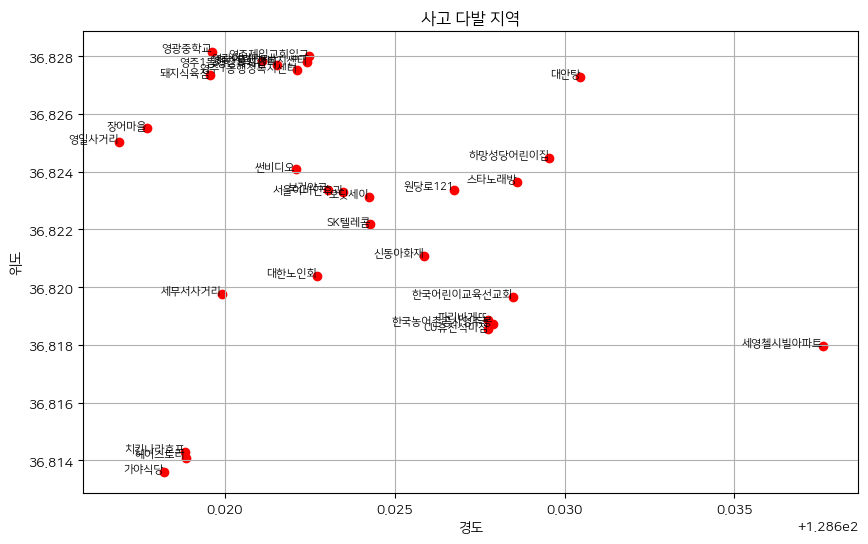

In [ ]:
import matplotlib.pyplot as plt

# 데이터프레임의 x와 y 좌표
x = df_col['경도'].astype(float)
y = df_col['위도'].astype(float)

# 그래프 생성
plt.figure(figsize=(10, 6))

# 산점도 그리기
plt.scatter(x, y, color='red')

# 각 점에 대한 라벨 표시
for i, txt in enumerate(df_col['부근']):
    plt.annotate(txt, (x[i], y[i]), fontsize=8, ha='right')

# 축과 제목 설정
plt.xlabel('경도')
plt.ylabel('위도')
plt.title('사고 다발 지역')

# 그래프 표시
plt.grid(True)
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# 데이터프레임의 x와 y 좌표
X = df_col[['경도', '위도']].astype(float)

# K-Means 모델 생성 및 학습
kmeans = KMeans(n_clusters=4, random_state=42)  # 클러스터 개수를 3으로 설정합니다.
kmeans.fit(X)

# 클러스터 중심 좌표
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[128.62055033,  36.82689413],
       [128.62648841,  36.82199911],
       [128.63761293,  36.81796853],
       [128.6189477 ,  36.81543884]])

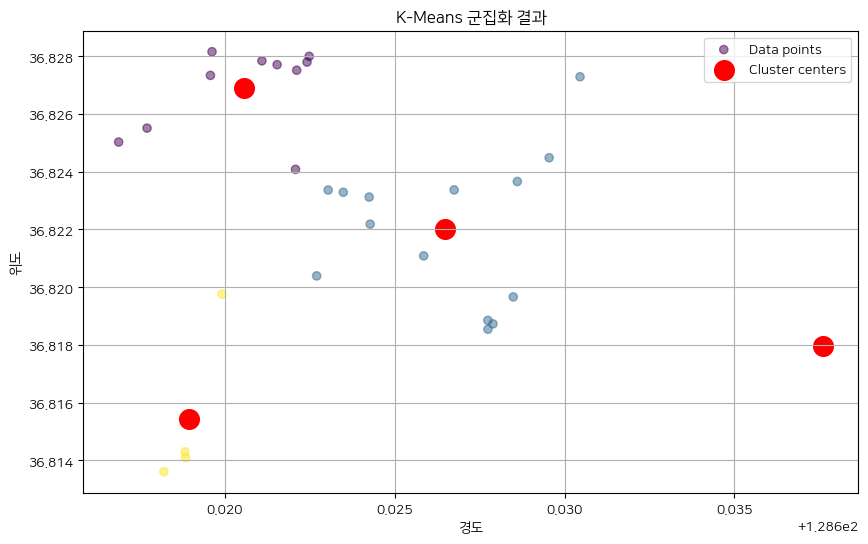

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(X['경도'], X['위도'], c=kmeans.labels_, cmap='viridis', alpha=0.5, label='Data points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', s=200, color='red', label='Cluster centers')

plt.xlabel('경도')
plt.ylabel('위도')
plt.title('K-Means 군집화 결과')

plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()

In [ ]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점명      29 non-null     object 
 1   사고건수     29 non-null     int64  
 2   사상자수     29 non-null     int64  
 3   사망자수     29 non-null     int64  
 4   중상자수     29 non-null     int64  
 5   경상자수     29 non-null     int64  
 6   부상신고자수   29 non-null     int64  
 7   다발지역폴리곤  29 non-null     object 
 8   경도       29 non-null     object 
 9   위도       29 non-null     object 
 10  시        29 non-null     object 
 11  동        29 non-null     object 
 12  부근       29 non-null     object 
 13  폴리곤      29 non-null     object 
 14  중심위경도    29 non-null     object 
 15  폴리곤한점    29 non-null     object 
 16  반지름(m)   29 non-null     float64
dtypes: float64(1), int64(6), object(10)
memory usage: 4.0+ KB


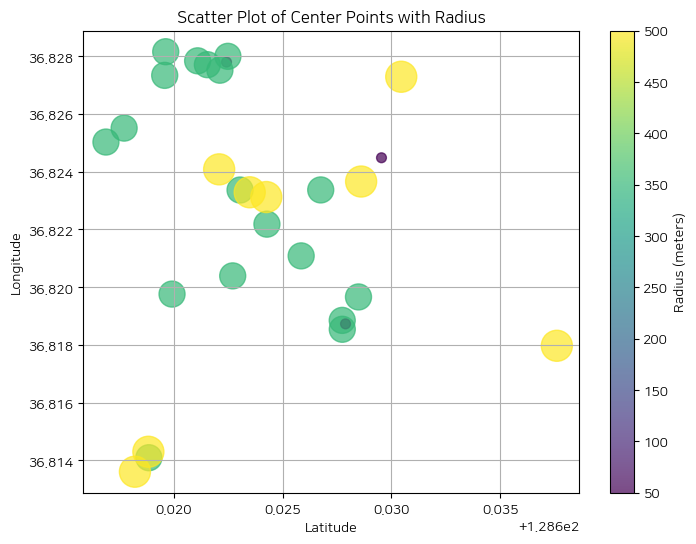

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 데이터 프레임에서 중심위경도와 radius 가져오기
center = df_col[['경도', '위도']].astype(float).values  # 넘파이 배열로 변환
radius = df_col['반지름(m)'].astype(float).values  # 넘파이 배열로 변환

# 반지름 값을 정규화(normalize)합니다.
scaler = MinMaxScaler(feature_range=(0.1, 1))  # 최소값과 최대값을 조정합니다.
scaled_radius = scaler.fit_transform(radius.reshape(-1, 1)) * 500  # 스케일을 조절합니다.

# Scatter plot 그리기
plt.figure(figsize=(8, 6))
plt.scatter(center[:, 0], center[:, 1], s=scaled_radius, c=scaled_radius, cmap='viridis', alpha=0.7)
plt.colorbar(label='Radius (meters)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Center Points with Radius')
plt.grid(True)
plt.show()

In [ ]:
for i in range (0,29):
  poly_list= df_col['폴리곤'][i]
  print(poly_list[0])

[128.62141889, 36.82815316]
[128.62953794, 36.81884802]
[128.63044485, 36.82448067]
[128.62879064, 36.81872729]
[128.62331715, 36.82779329]
[128.62391154, 36.82751302]
[128.63028566, 36.81966]
[128.62170997, 36.81975912]
[128.62854843, 36.82336639]
[128.62427854, 36.82799369]
[128.62449951, 36.82038934]
[128.61866958, 36.82502497]
[128.62333464, 36.82770429]
[128.62483808, 36.82336324]
[128.62954046, 36.8185403]
[128.62764927, 36.8210822]
[128.62137185, 36.82733424]
[128.62607366, 36.82218129]
[128.61950588, 36.82550742]
[128.62288687, 36.827838]
[128.62064365, 36.81409191]
[128.6258331, 36.8243944]
[128.6320404, 36.8285603]
[128.6197906, 36.814881]
[128.6301956, 36.8249319]
[128.6236649, 36.8253536]
[128.6204097, 36.8155721]
[128.639198, 36.8192429]
[128.6250707, 36.8245596]


In [ ]:
cluster_centers = [[lat, lon] for lon, lat in cluster_centers] # 순서 바꾸기
cluster_centers

[[36.8268941332994, 128.6205503282198],
 [36.82199911200857, 128.62648841454194],
 [36.817968528526, 128.637612928095],
 [36.815438840831, 128.61894769800375]]

In [ ]:
url1= 'https://map.naver.com/p/search/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%20%EA%B2%BD%EC%83%81%EB%B6%81%EB%8F%84%20%EC%98%81%EC%A3%BC%EC%8B%9C%20%EC%98%81%EC%A3%BC%EB%8F%99%20464-64/address/14317984.3061522,4415004.7643197,%EA%B2%BD%EC%83%81%EB%B6%81%EB%8F%84%20%EC%98%81%EC%A3%BC%EC%8B%9C%20%EC%98%81%EC%A3%BC%EB%8F%99%20464-64,jibun?c=18.00,0,0,0,adh&p=gN8KXIgIggy78J1DVYJelA,82,-3.46,80,Float&isCorrectAnswer=true'
url2= 'https://map.naver.com/p/search/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%20%EA%B2%BD%EC%83%81%EB%B6%81%EB%8F%84%20%EC%98%81%EC%A3%BC%EC%8B%9C%20%ED%95%98%EB%A7%9D%EB%8F%99%20422-43/address/14318645.5216636,4414327.0367615,%EA%B2%BD%EC%83%81%EB%B6%81%EB%8F%84%20%EC%98%81%EC%A3%BC%EC%8B%9C%20%ED%95%98%EB%A7%9D%EB%8F%99%20422-43,jibun?c=19.00,0,0,0,adh&p=x14n9GaJCdNmqhixVk0E5A,138.15,-14.06,80,Float&isCorrectAnswer=true'
url3= 'https://map.naver.com/p/search/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%20%EA%B2%BD%EC%83%81%EB%B6%81%EB%8F%84%20%EC%98%81%EC%A3%BC%EC%8B%9C%20%ED%9C%B4%EC%B2%9C%EB%8F%99%201210-1/address/14319881.6466852,4413765.6572576,%EA%B2%BD%EC%83%81%EB%B6%81%EB%8F%84%20%EC%98%81%EC%A3%BC%EC%8B%9C%20%ED%9C%B4%EC%B2%9C%EB%8F%99%201210-1,jibun?c=19.00,0,0,0,adh&p=peKBlFDTzJiFl3pH98Qd4Q,-70.29,-14.43,80,Float&isCorrectAnswer=true'
url4= 'https://map.naver.com/p/search/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%20%EA%B2%BD%EC%83%81%EB%B6%81%EB%8F%84%20%EC%98%81%EC%A3%BC%EC%8B%9C%20%EC%A7%80%EC%B2%9C%EB%A1%9C%20169-2/address/14317800.1837144,4413415.6756922,%EA%B2%BD%EC%83%81%EB%B6%81%EB%8F%84%20%EC%98%81%EC%A3%BC%EC%8B%9C%20%EC%A7%80%EC%B2%9C%EB%A1%9C%20169-2,new?c=19.00,0,0,0,adh&p=I5Z0RQI6RNnncdIN01eNrA,-71.84,-11.71,80,Float&isCorrectAnswer=true'

In [ ]:
url_map = [url1, url2, url3, url4]

In [ ]:
doro = ['대한민국 경상북도 영주시 영주동 464-64',
'대한민국 경상북도 영주시 하망동 422-43',
'대한민국 경상북도 영주시 휴천동 1210-1',
'대한민국 경상북도 영주시 지천로 169-2']

In [ ]:
doro[0]

'대한민국 경상북도 영주시 영주동 464-64'

In [ ]:
url_map[0]

'https://map.naver.com/p/search/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%20%EA%B2%BD%EC%83%81%EB%B6%81%EB%8F%84%20%EC%98%81%EC%A3%BC%EC%8B%9C%20%EC%98%81%EC%A3%BC%EB%8F%99%20464-64/address/14317984.3061522,4415004.7643197,%EA%B2%BD%EC%83%81%EB%B6%81%EB%8F%84%20%EC%98%81%EC%A3%BC%EC%8B%9C%20%EC%98%81%EC%A3%BC%EB%8F%99%20464-64,jibun?c=18.00,0,0,0,adh&p=gN8KXIgIggy78J1DVYJelA,82,-3.46,80,Float&isCorrectAnswer=true'

"OpenStreetMap"

"Mapbox Bright" (Limited levels of zoom for free tiles)

"Mapbox Control Room" (Limited levels of zoom for free tiles)

"Stamen" (Terrain, Toner, and Watercolor)

"Cloudmade" (Must pass API key)

"Mapbox" (Must pass API key)

"CartoDB" (positron and dark_matter)

In [ ]:



import folium

m = folium.Map(location=[36.82815316, 128.62141889], zoom_start=15)


for i in range(0,29):
  poly_list= df_col['폴리곤'][i][0]
  dot = [poly_list[1], poly_list[0]] # 위경도 순서 맞춰주기
  # 지나가는 점

  center = centers[i]
  # 중심점

  # print(f'\n {i}번째:', center, dot)

  radius = geodesic(center, dot).meters


  popup = f"""
        <div class='custom-popup'>
            사망자수: {df["사망자수"][i]}명 <br>
            중상자수: {df["중상자수"][i]}명 <br>
            경상자수: {df["경상자수"][i]}명 <br>
            부상신고자수: {df["부상신고자수"][i]}명 <br>
            -------------------------- <br>
            총 사고수: {df["사고건수"][i]}건
        </div>
    """


  #지도 표현

  folium.Circle(location=center,
                radius=radius,
                color='None',
                fill=True,
                fill_color='red',
                tooltip = df_col['부근'][i],
                popup = folium.Popup(popup, max_width=300),
                alpha = 1.0).add_to(m)

for location, i,j in zip(cluster_centers, url_map,doro):
  folium.Marker(
      location=location,
      icon=folium.Icon(color='black', icon='star'),
      popup= f"<a href = {i} target =_blink>🚗map🚕</a>",
#      popup=folium.Popup(i, max_width=300),
      tooltip = f'💥위험구역! - {j}💥'
  ).add_to(m)




m


# knn -> 중심 -> 클러스터링 중심값들만 모아서
# 엘보우기법
# 중심점 찾아서 표시할 수 있음!



In [ ]:
from xyzservices.lib import TileProvider
import xyzservices.providers as xyz

providers = xyz.flatten()

selection = ['CartoDB.Positron',
                'CartoDB.Voyager'
                ]

for tiles_name in selection:
    tiles = providers[tiles_name]
    folium.TileLayer(
        tiles=tiles.build_url(),
        attr=tiles.html_attribution,
        name=tiles.name,
    ).add_to(m)

folium.LayerControl().add_to(m)


import folium

m = folium.Map(location=[36.82815316, 128.62141889], zoom_start=15,
                   tiles='Stamen Terrain')


for i in range(0,29):
  poly_list= df_col['폴리곤'][i][0]
  dot = [poly_list[1], poly_list[0]] # 위경도 순서 맞춰주기
  # 지나가는 점

  center = centers[i]
  # 중심점

  # print(f'\n {i}번째:', center, dot)

  radius = geodesic(center, dot).meters


  popup = f"""
        <div class='custom-popup'>
            사망자수: {df["사망자수"][i]}명 <br>
            중상자수: {df["중상자수"][i]}명 <br>
            경상자수: {df["경상자수"][i]}명 <br>
            부상신고자수: {df["부상신고자수"][i]}명 <br>
            -------------------------- <br>
            총 사고수: {df["사고건수"][i]}건
        </div>
    """


  #지도 표현

  folium.Circle(location=center,
                radius=radius,
                color='None',
                fill=True,
                fill_color='red',
                tooltip = df_col['부근'][i],
                popup = folium.Popup(popup, max_width=300),
                alpha = 1.0).add_to(m)

for location, i,j in zip(cluster_centers, url_map,doro):
  folium.Marker(
      location=location,
      icon=folium.Icon(color='black', icon='star'),
      popup= f"<a href = {i} target =_blink>🚗map🚕</a>",
#      popup=folium.Popup(i, max_width=300),
      tooltip = f'💥위험구역! - {j}💥'
  ).add_to(m)


provider = TileProvider.from_qms("OpenTopoMap")
folium.TileLayer(provider).add_to(m)

m

In [ ]:
vworld_key="0A158EEE-4373-3AC5-A794-4DBE40522E46"


m = folium.Map(location=[36.82815316, 128.62141889], zoom_start=15)


# 배경지도 타일 설정하기
layer = "Satellite"
tileType = "jpeg"
tiles = f"http://api.vworld.kr/req/wmts/1.0.0/{vworld_key}/{layer}/{{z}}/{{y}}/{{x}}.{tileType}"
attr = "Vworld"



for i in range(0,29):
  poly_list= df_col['폴리곤'][i][0]
  dot = [poly_list[1], poly_list[0]] # 위경도 순서 맞춰주기
  # 지나가는 점

  center = centers[i]
  # 중심점

  # print(f'\n {i}번째:', center, dot)

  radius = geodesic(center, dot).meters


  popup = f"""
        <div class='custom-popup'>
            사망자수: {df["사망자수"][i]}명 <br>
            중상자수: {df["중상자수"][i]}명 <br>
            경상자수: {df["경상자수"][i]}명 <br>
            부상신고자수: {df["부상신고자수"][i]}명 <br>
            -------------------------- <br>
            총 사고수: {df["사고건수"][i]}건
        </div>
    """


  #지도 표현

  folium.Circle(location=center,
                radius=radius,
                color='None',
                fill=True,
                fill_color='red',
                tooltip = df_col['부근'][i],
                popup = folium.Popup(popup, max_width=300),
                alpha = 1.0).add_to(m)

for location, i,j in zip(cluster_centers, url_map,doro):
  folium.Marker(
      location=location,
      icon=folium.Icon(color='black', icon='star'),
      popup= f"<a href = {i} target =_blink>🚗map🚕</a>",
#      popup=folium.Popup(i, max_width=300),
      tooltip = f'💥위험구역! - {j}💥'
  ).add_to(m)


folium.TileLayer(
    tiles=tiles,
    attr=attr,
    overlay=True,
    control=True
).add_to(m)



m


In [ ]:
 #참고
import folium

# 지도 객체 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=10)

# 마커 추가
marker = folium.Marker(
    location=[37.5665, 126.9780],
    popup='Seoul',
    tooltip='Click here!',  # 툴팁 추가
    icon=folium.Icon(color='blue', icon='info-sign')
)

# 툴팁 스타일 지정
tooltip_style = {
    'background-color': 'blue',
    'color': 'white',
    'font-family': 'Arial',
    'font-size': '12px',
    'border': '2px solid white',
    'border-radius': '4px',
    'padding': '6px'
}

# 마커에 툴팁 스타일 적용
marker.add_to(m)

# HTML 파일로 저장
m

# 동별 구역 나누기(geo)

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

sig_shp = '/content/drive/MyDrive/😵산대특 팀프로젝트/🐥🐤🐣영주시🧡💚💙/code/data/sig.shp'
sig = gpd.read_file(sig_shp, encoding = 'cp949')
sig

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.250, 964875.565 1..."
...,...,...,...,...
245,51790,Hwacheon-gun,화천군,"POLYGON ((1027779.614 2032000.017, 1027951.841..."
246,51800,Yanggu-gun,양구군,"MULTIPOLYGON (((1046391.747 2032451.649, 10463..."
247,51810,Inje-gun,인제군,"POLYGON ((1041948.853 1995343.843, 1042054.076..."
248,51820,Goseong-gun,고성군,"MULTIPOLYGON (((1091705.056 2034023.203, 10917..."


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

emd_shp = '/content/drive/MyDrive/😵산대특 팀프로젝트/🐥🐤🐣영주시🧡💚💙/code/data/emd.shp'
emd = gpd.read_file(emd_shp, encoding = 'cp949')
emd

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.190 1..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."
...,...,...,...,...
5060,51830310,Seo-myeon,서면,"POLYGON ((1079287.552 2011045.570, 1079356.150..."
5061,51830320,Sonyang-myeon,손양면,"MULTIPOLYGON (((1102997.769 2009910.288, 11029..."
5062,51830330,Hyeonbuk-myeon,현북면,"MULTIPOLYGON (((1108475.024 2002913.557, 11084..."
5063,51830340,Hyeonnam-myeon,현남면,"MULTIPOLYGON (((1114466.017 1992227.421, 11145..."


In [ ]:
# emd.to_excel('check.xlsx')

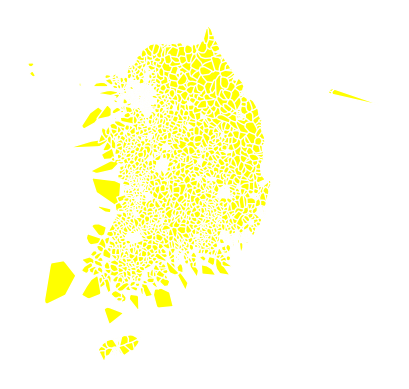

In [ ]:
emd_map = emd.convex_hull.plot(color='yellow', edgecolor="w")
emd_map.set_axis_off()

In [ ]:
yj = emd.iloc[3862:3885,:]
yj
yj


,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
3862,47210101,Yeongju-dong,영주동,"POLYGON ((1100420.546 1870983.096, 1100415.629..."
3863,47210102,Sangmang-dong,상망동,"POLYGON ((1101317.531 1870667.356, 1101307.282..."
3864,47210103,Hamang-dong,하망동,"POLYGON ((1100621.056 1872088.965, 1100718.621..."
3865,47210104,Hyucheon-dong,휴천동,"POLYGON ((1101387.110 1869955.813, 1101392.069..."
3866,47210105,Gaheung-dong,가흥동,"POLYGON ((1098480.527 1871753.753, 1098504.543..."
3867,47210106,Munjeong-dong,문정동,"POLYGON ((1098979.647 1868257.832, 1098993.823..."
3868,47210107,Gohyeon-dong,고현동,"POLYGON ((1098947.988 1875042.831, 1098949.346..."
3869,47210108,Changjin-dong,창진동,"POLYGON ((1098160.949 1873544.167, 1098180.624..."
3870,47210109,Sangjul-dong,상줄동,"POLYGON ((1095930.216 1871880.843, 1095942.752..."
3871,47210110,Jowa-dong,조와동,"POLYGON ((1101978.166 1876298.556, 1102007.406..."


# 깃허브에서 가져온 geo 위경도



In [ ]:
import json
geo_path = '/content/drive/MyDrive/😵산대특 팀프로젝트/🐥🐤🐣영주시🧡💚💙/code/data/영주시.json'
geo_str = json.load(open(geo_path, encoding = 'utf-8'))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '3706063',
    'name': '가흥2동',
    'name_eng': 'Gaheung 2(i)-dong',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[128.62708714739898, 36.833000534175724],
      [128.61537173025593, 36.822879009954256],
      [128.6175689758494, 36.81777878608913],
      [128.59540227541618, 36.81292992286847],
      [128.57278873695725, 36.82322510543166],
      [128.5942521840154, 36.85614711383624],
      [128.61194756646034, 36.86552835766716],
      [128.62708714739898, 36.833000534175724]]]}},
  {'type': 'Feature',
   'properties': {'code': '3706062',
    'name': '가흥1동',
    'name_eng': 'Gaheung 1(il)-dong',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[128.6230866409642, 36.81642809332025],
      [128.61558229743906, 36.79926155361069],
      [128.6136447554895, 36.77992720959232],
      [128.61041525273927, 36.78151574589776],
      

In [ ]:
# 고도데이터에 쓸꺼임
coordinates_list = []

for feature in geo_str['features']:
    coordinates = feature['geometry']['coordinates']
    coordinates_list.append(coordinates)

print(coordinates_list)

[[[[128.62708714739898, 36.833000534175724], [128.61537173025593, 36.822879009954256], [128.6175689758494, 36.81777878608913], [128.59540227541618, 36.81292992286847], [128.57278873695725, 36.82322510543166], [128.5942521840154, 36.85614711383624], [128.61194756646034, 36.86552835766716], [128.62708714739898, 36.833000534175724]]], [[[128.6230866409642, 36.81642809332025], [128.61558229743906, 36.79926155361069], [128.6136447554895, 36.77992720959232], [128.61041525273927, 36.78151574589776], [128.59540227541618, 36.81292992286847], [128.6175689758494, 36.81777878608913], [128.6230866409642, 36.81642809332025]]], [[[128.62820990601304, 36.81793340411873], [128.66714843124595, 36.80041628279969], [128.65039654753946, 36.78688127065156], [128.6136447554895, 36.77992720959232], [128.61558229743906, 36.79926155361069], [128.63071576206585, 36.80307539831045], [128.6230866409642, 36.81642809332025], [128.62820990601304, 36.81793340411873]]], [[[128.61558229743906, 36.79926155361069], [128.6

In [ ]:
# 고도데이터에 쓸꺼임

# coordinates에서 위도 및 경도 추출
latitudes = [coord[1] for feature in coordinates_list for coord in feature]
longitudes = [coord[0] for feature in coordinates_list for coord in feature]

# 위도와 경도의 최소 및 최대값 계산
min_latitude = min(latitudes)
max_latitude = max(latitudes)
min_longitude = min(longitudes)
max_longitude = max(longitudes)

# 결과 출력
print("Minimum Latitude:", min_latitude)
print("Maximum Latitude:", max_latitude)
print("Minimum Longitude:", min_longitude)
print("Maximum Longitude:", max_longitude)

Minimum Latitude: [128.51341982470976, 36.785424133637136]
Maximum Latitude: [128.74518673697727, 36.75285801144824]
Minimum Longitude: [128.48719195002622, 36.95458573615004]
Maximum Longitude: [128.74563064468117, 36.793231495384816]


In [ ]:
names = [feature['properties']['name'] for feature in geo_str['features']]

# 추출한 이름들을 이용하여 데이터프레임 생성
names = pd.DataFrame({'name': names})

# 데이터프레임 출력
names.to_excel('real yj.xlsx',  index = False)

In [ ]:
df_ = pd.read_excel('/content/real yj.xlsx')
df_
df_['인구수'] = [100,200,300,400,500,600,500,500,600,700,800,600,200,300,400,500,600,700,800]
df_

,name,인구수
0,가흥2동,100
1,가흥1동,200
2,휴천3동,300
3,휴천2동,400
4,휴천1동,500
5,영주2동,600
6,영주1동,500
7,하망동,500
8,상망동,600
9,부석면,700


In [ ]:
import folium

m = folium.Map(location=[36.89926155361069, 128.61558229743906], zoom_start=11)


folium.Choropleth(geo_data=geo_str,
    data=df_,
    columns=['name','인구수'],
    fill_color='PuRd',
    key_on='properties.name',
                  hilight = True, fill_opacity = 0.5, line_opacity = 1
).add_to(m)

m

In [ ]:
list(yj['EMD_KOR_NM'])

['영주동',
 '상망동',
 '하망동',
 '휴천동',
 '가흥동',
 '문정동',
 '고현동',
 '창진동',
 '상줄동',
 '조와동',
 '조암동',
 '적서동',
 '아지동',
 '풍기읍',
 '이산면',
 '평은면',
 '문수면',
 '장수면',
 '안정면',
 '봉현면',
 '순흥면',
 '단산면',
 '부석면']

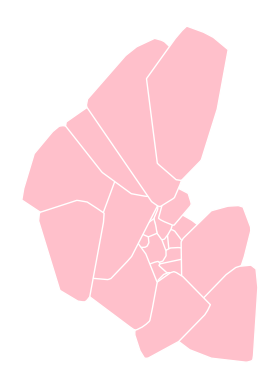

In [ ]:
ax = yj.convex_hull.plot(color='pink', edgecolor="w")
ax.set_axis_off()                            # 축제거
plt.show()
